In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

## Descripción del problema

Este problema consite en determinar el rendimiento relativo de una CPU a partir de sus características.

Donde se tienen la siguientes características:
- Vendor Name → Nombre del vendedor de la CPU
- Model Name → Modelo de la CPU
- MYCT →  Tiempo del cliclo de la máquina en nanosegundos
- MMIN → Memoria principal minima de la CPU en Kilobytes
- MMAX → Memoria principal máxima de la CPU en Kilobytes
- CACH → Memoria Cache de la CPU en Kilobytes
- CHMIN → Canales mínimos de la CPU en unidades
- CHMAX → Canales máximos de la CPU en unidades
- PRP → Rendimiento relativo publicado 


### Descripción base de datos

##### 1.- Lectura del conjunto de datos.

In [2]:
df = pd.read_csv("machine.data",header=None,usecols=[i for i in range(9)],names=["vendor name","Model Name","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP"])
df

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,32/60,125,256,6000,256,16,128,198
1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,amdahl,470v/7c,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46
206,sratus,32,125,2000,8000,0,2,14,52
207,wang,vs-100,480,512,8000,32,0,0,67


#### 2.- Variable de predicción -> PRP que es el rendimiento relativo publicado 

#### 3.- Análisis para determinar que atributos del conjunto utilizar para realizar el modelamiento del problema.

In [3]:
df.dtypes

vendor name    object
Model Name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
dtype: object

In [4]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


In [5]:
df.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


<AxesSubplot:xlabel='MMAX', ylabel='PRP'>

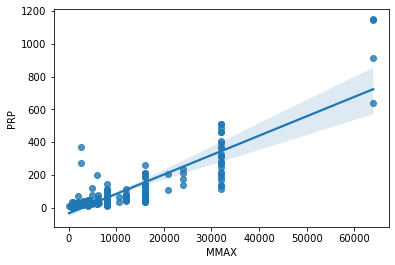

In [7]:
sns.regplot(x="MMAX", y="PRP", data=df)

<AxesSubplot:xlabel='MMIN', ylabel='PRP'>

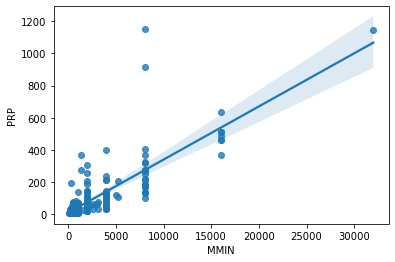

In [6]:
sns.regplot(x="MMIN", y="PRP", data=df)

<AxesSubplot:xlabel='MYCT', ylabel='PRP'>

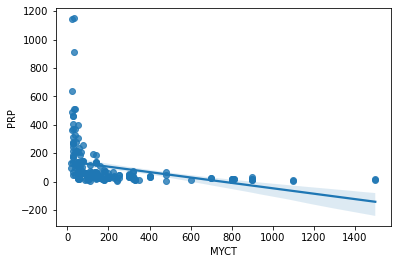

In [8]:
sns.regplot(x="MYCT", y="PRP", data=df)

### Atributo categorico de Vendedor vs performance

<AxesSubplot:xlabel='vendor name', ylabel='PRP'>

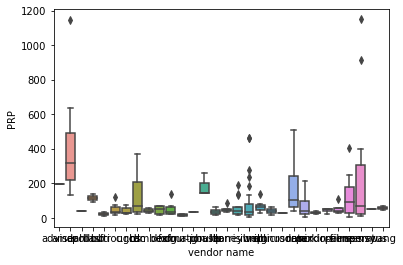

In [12]:
sns.boxplot(x="vendor name", y="PRP", data=df)

A partir de la grafica se puede observar que los precios entre los diferentes vendedores tienen muchas superposiciones dado tambien el numero de vendedores que se cuenta que son 30, por lo que se puede concluir que el atributo categorico del vendedor no es un buen predictor para la performance

## Canales máximos de la CPU en unidades versus Rendimiento relativo publicado 

In [20]:
coeficiente_pearson, valor_p = stats.pearsonr(df['CHMAX'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.605209292812674  con un valor de P = 2.84776450645363e-22


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre los *Canales máximos de la CPU* y el *Rendimiento relativo publicado* es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0.6052).

## Canales mínimos de la CPU en unidades versus Rendimiento relativo publicado 

In [21]:
coeficiente_pearson, valor_p = stats.pearsonr(df['CHMIN'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.6089032834114066  con un valor de P = 1.3573247959670938e-22


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre los *Canales mínimos de la CPU en unidades* y el *Rendimiento relativo publicado* es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0.6089).

## Memoria Cache de la CPU en Kilobytes versus Rendimiento relativo publicado 

In [18]:
coeficiente_pearson, valor_p = stats.pearsonr(df['CACH'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.662641426678319  con un valor de P = 8.505256503661147e-28


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre los *Memoria Cache de la CPU en Kilobytes* y el *Rendimiento relativo publicado* es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0.6626).

## Tiempo del cliclo de la máquina en nanosegundos versus Rendimiento relativo publicado 

In [17]:
coeficiente_pearson, valor_p = stats.pearsonr(df['MYCT'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es -0.3070994470957124  con un valor de P = 6.101790154081428e-06


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre los *Tiempo del cliclo de la máquina en nanosegundos* y el *Rendimiento relativo publicado* es estadísticamente significativa, pero la relación lineal es débil (~-0.3070).

## Memoria principal máxima de la CPU en Kilobytes versus Rendimiento relativo publicado 

In [14]:
coeficiente_pearson, valor_p = stats.pearsonr(df['MMAX'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.8630041243651341  con un valor de P = 2.6488889977498764e-63


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre los *Memoria principal máxima de la CPU en Kilobytes* y el *Rendimiento relativo publicado* es estadísticamente significativa y tienen una relación lineal muy fuerte (~0.8630).

## Memoria principal minima de la CPU en Kilobytes versus Rendimiento relativo publicado 

In [15]:
coeficiente_pearson, valor_p = stats.pearsonr(df['MMIN'], df['PRP'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.7949313405266916  con un valor de P = 8.268502737490913e-47


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre los *Memoria principal minima de la CPU en Kilobytes* y el *Rendimiento relativo publicado* es estadísticamente significativa y la relación lineal (~-0.3070).